<a href="https://colab.research.google.com/github/albaqawih/LLM-projects/blob/main/projcect_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install keyphrase-vectorizers
!pip install transformers
!pip install sentence-transformers
!pip install gradio



  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
  Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2024.5.0-py3-none-any.whl.metadata (11 kB)
Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached fsspec-2024.5.0-py3-none-any.whl (316 kB)
Using cached pyarrow-17.0.0-cp310-cp310-manylinux_2_28_x86_64.whl (39.9 MB)
Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (194 kB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.

In [ ]:
from datasets import load_dataset

ds = load_dataset("traversaal-ai-hackathon/hotel_datasets")


In [ ]:
import pandas as pd
df = pd.DataFrame(ds["train"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5997 entries, 0 to 5996
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         5997 non-null   object 
 1   hotel_description  5197 non-null   object 
 2   review_title       5997 non-null   object 
 3   review_text        4867 non-null   object 
 4   rate               4867 non-null   float64
 5   tripdate           5997 non-null   object 
 6   hotel_url          5997 non-null   object 
 7   hotel_image        5997 non-null   object 
 8   price_range        5997 non-null   object 
 9   rating_value       5997 non-null   float64
 10  review_count       5997 non-null   int64  
 11  street_address     5997 non-null   object 
 12  locality           5997 non-null   object 
 13  country            5997 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 656.0+ KB


In [ ]:
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
hotel_name              0
hotel_description     800
review_title            0
review_text          1130
rate                 1130
tripdate                0
hotel_url               0
hotel_image             0
price_range             0
rating_value            0
review_count            0
street_address          0
locality                0
country                 0
dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Display initial missing value counts
print("Initial missing values per column:")
print(df.isnull().sum())

# Fill missing values in 'review_text' with an empty string and 'rate' with a specific value
df['review_text'].fillna('', inplace=True)
df['rate'].fillna(df['rate'].mean(), inplace=True)  # Filling with mean for example

# Fill missing values in 'hotel_description' with a placeholder
df['hotel_description'].fillna('Description not available', inplace=True)

# Verify the cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Display the cleaned DataFrame (first few rows)
print("\nCleaned DataFrame sample:")
print(df.head())


Initial missing values per column:
hotel_name              0
hotel_description     800
review_title            0
review_text          1130
rate                 1130
tripdate                0
hotel_url               0
hotel_image             0
price_range             0
rating_value            0
review_count            0
street_address          0
locality                0
country                 0
dtype: int64

Missing values after cleaning:
hotel_name           0
hotel_description    0
review_title         0
review_text          0
rate                 0
tripdate             0
hotel_url            0
hotel_image          0
price_range          0
rating_value         0
review_count         0
street_address       0
locality             0
country              0
dtype: int64

Cleaned DataFrame sample:
               hotel_name                                  hotel_description  \
0  Romance Istanbul Hotel  Romance Istanbul Hotel has 39 rooms.Every room...   
1  Romance Istanbul Hotel  Romance

In [ ]:
from sentence_transformers import SentenceTransformer, util
embedding = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
df.hotel_name.value_counts()

,count
hotel_name,
Romance Istanbul Hotel,40
Motto by Hilton New York City Chelsea,40
The Bryant Park Hotel,40
Pod Times Square,40
Tempo by Hilton New York Times Square,40
...,...
San Francisco Marriott Fisherman's Wharf,40
Hilton San Francisco Financial District,40
The Donatello,40


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your DataFrame (assuming it's named df)
# Ensure that df is defined elsewhere in your code with the appropriate data

# Normalize country names
df['country'] = df['country'].replace({'Türkiye': 'Turkiye'})

# Check the value counts to verify the replacement
print(df['country'].value_counts())

def clean_text(text):
    """
    Cleans text data by removing punctuation, converting to lowercase, removing stopwords, and lemmatizing.

    Args:
    text: The text string to be cleaned.

    Returns:
    The cleaned text string.
    """
    # Handle None or empty values
    if pd.isnull(text):
        return ""

    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens back into a string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply text cleaning to the 'review_text' column
df['cleaned_reviews'] = df['review_text'].apply(clean_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


country
United States     2397
Turkiye           1200
United Kingdom    1200
France            1200
Name: count, dtype: int64


In [ ]:
print(df.columns)

Index(['hotel_name', 'hotel_description', 'review_title', 'review_text',
       'rate', 'tripdate', 'hotel_url', 'hotel_image', 'price_range',
       'rating_value', 'review_count', 'street_address', 'locality', 'country',
       'cleaned_reviews'],
      dtype='object')


In [ ]:
print(df.isnull().sum())

hotel_name           0
hotel_description    0
review_title         0
review_text          0
rate                 0
tripdate             0
hotel_url            0
hotel_image          0
price_range          0
rating_value         0
review_count         0
street_address       0
locality             0
country              0
cleaned_reviews      0
dtype: int64


In [ ]:
from datasets import load_dataset
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('vader_lexicon')

# Load the dataset
ds = load_dataset("traversaal-ai-hackathon/hotel_datasets")

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def classify_sentiment(review):
    """
    Classifies the sentiment of a review as positive, negative, or neutral.

    Args:
    review: The text of the review.

    Returns:
    A string indicating the sentiment category: 'positive', 'negative', or 'neutral'.
    """
    # Handle None values
    if review is None:
        return 'neutral'  # Or any default value you prefer

    # Get sentiment scores
    sentiment = sia.polarity_scores(review)
    # Determine sentiment category
    if sentiment['compound'] > 0.05:
        return 'positive'
    elif sentiment['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to classify each review using the correct column name 'cleaned_reviews'
df['Sentiment'] = df['cleaned_reviews'].apply(classify_sentiment)

# Group reviews by sentiment
positive_reviews = df[df['Sentiment'] == 'positive']
neutral_reviews = df[df['Sentiment'] == 'neutral']
negative_reviews = df[df['Sentiment'] == 'negative']

# Display results in a structured table
def display_table(df, sentiment, title):
    print(f"\n{title} Reviews:")
    display_df = df[['hotel_name', 'cleaned_reviews', 'Sentiment']].head(5)
    print(display_df.to_markdown(index=False))

# Display structured tables for each sentiment category
display_table(positive_reviews, 'positive', "Positive")
display_table(neutral_reviews, 'neutral', "Neutral")
display_table(negative_reviews, 'negative', "Negative")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Positive Reviews:
| hotel_name             | cleaned_reviews                                                                                                                                                                                                                                                       | Sentiment   |
|:-----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------|
| Romance Istanbul Hotel | good location good room welcoming staff clean comfortable room absolutely best positive thing location near tram station hotel atposphere good friendly staff nice service else thanks especially shirin help really nice trip u                                      | positive    |
| Romance Istanbul Hotel | best hotel old city stay day family rea

Number of unique localities: 5
Sample localities: ['Istanbul' 'San Francisco' 'London' 'New York City' 'Paris']

Available localities:
1. Istanbul
2. San Francisco
3. London
4. New York City
5. Paris

Select a locality by number: 1

You selected: Istanbul


<ipython-input-125-dc5357269665>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_hotels_locality, y='hotel_name', x='Positive Review Count', palette='viridis')


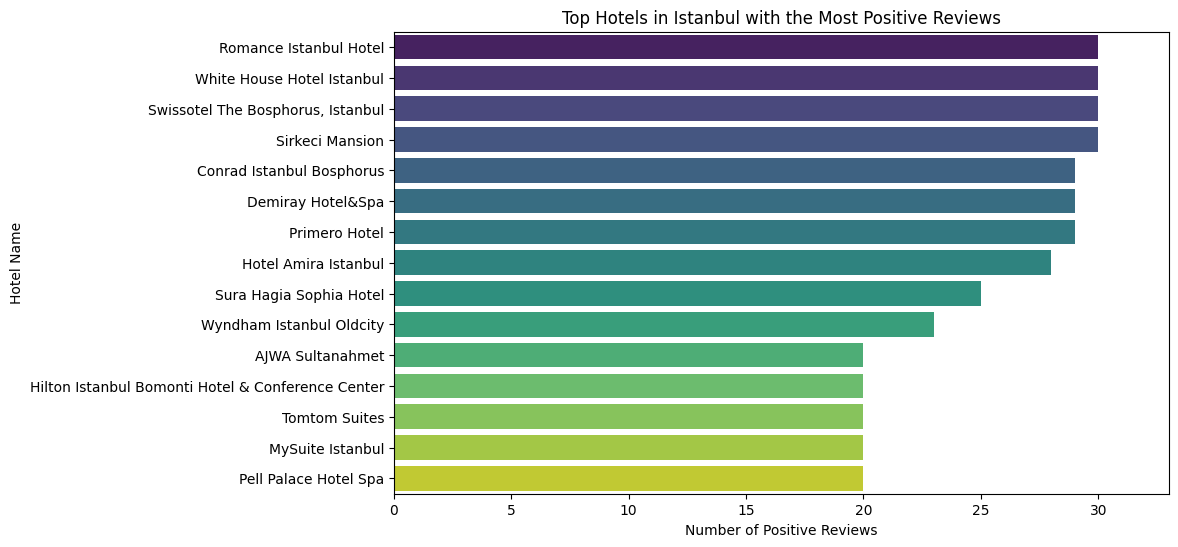

In [ ]:
# Check for unique localities
unique_localities = df['locality'].unique()
print(f"Number of unique localities: {len(unique_localities)}")
print("Sample localities:", unique_localities)

# Prompt user to choose a locality
print("\nAvailable localities:")
for index, locality in enumerate(unique_localities):
    print(f"{index + 1}. {locality}")

selected_index = int(input("\nSelect a locality by number: ")) - 1
selected_locality = unique_localities[selected_index]
print(f"\nYou selected: {selected_locality}")

# Filter DataFrame by the selected locality
df_selected_locality = df[df['locality'] == selected_locality]

# Analyze and plot the selected locality
positive_review_counts_locality = df_selected_locality[df_selected_locality['Sentiment'] == 'positive'].groupby('hotel_name').size().reset_index(name='Positive Review Count')
top_hotels_locality = positive_review_counts_locality.sort_values(by='Positive Review Count', ascending=False).head(15)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_hotels_locality, y='hotel_name', x='Positive Review Count', palette='viridis')
plt.title(f'Top Hotels in {selected_locality} with the Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Hotel Name')
plt.xlim(0, top_hotels_locality['Positive Review Count'].max() * 1.1)  # Adjust x-axis limit
plt.show()

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM

# Load the tokenizer and model explicitly
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization")

# Initialize the summarization pipeline with the tokenizer and model
pipe = pipeline("summarization", model=model, tokenizer=tokenizer)

# Group reviews by hotel
hotel_reviews = df.groupby('hotel_name')['cleaned_reviews'].apply(list).to_dict()

# Generate summaries for each hotel
hotel_summaries_detailed = {}
for hotel, reviews in hotel_reviews.items():
    all_reviews_text = ' '.join(reviews)

    # Tokenize the input text and truncate to the model's maximum length
    inputs = tokenizer(all_reviews_text, truncation=True, max_length=512, return_tensors="pt")  # Adjust max_length if needed

    # Summarize using the model
    summary_ids = model.generate(**inputs, max_length=100)  # Adjust max summary length as needed
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    hotel_summaries_detailed[hotel] = {
        "summary": summary
    }

# Print detailed summaries
for hotel, data in hotel_summaries_detailed.items():
    print(f"Hotel: {hotel}")
    print(f"Summary: {data['summary']}\n")

Hotel: AJWA Sultanahmet
Summary: hotel great location wonderful guests easy access city tram need to get around city bazaar easy walk every place old city using tram stayed purple suite view th floor super rain shower many year traveling good shower appreciated hospitality exceptional guests helpful. guests appreciate the hospitality exceptional guestliness and excellent hotel guests helpful guests.

Hotel: Ace Hotel New York
Summary: great experience the great experience ace hotel this impressive yet still cozy nyc surprisingly quiet nyc impressive yet. cozy butler hasslegreat bed soft pillow great water pressure lovely bath product mean really stellarsafe hotel ideal location whats love front desk always happy see love control bright light room dimmer switch control brightness every room ive slept well im light sleeper ask quite room room.

Hotel: Ameritania At Times Square
Summary: simply worded well - priced well - run hotel perfect trip see two broadway show staff helpful helpfuln

In [ ]:
df.rating_value.value_counts()


,count
rating_value,
4.5,2677
5.0,1520
4.0,1520
3.5,200
3.0,80


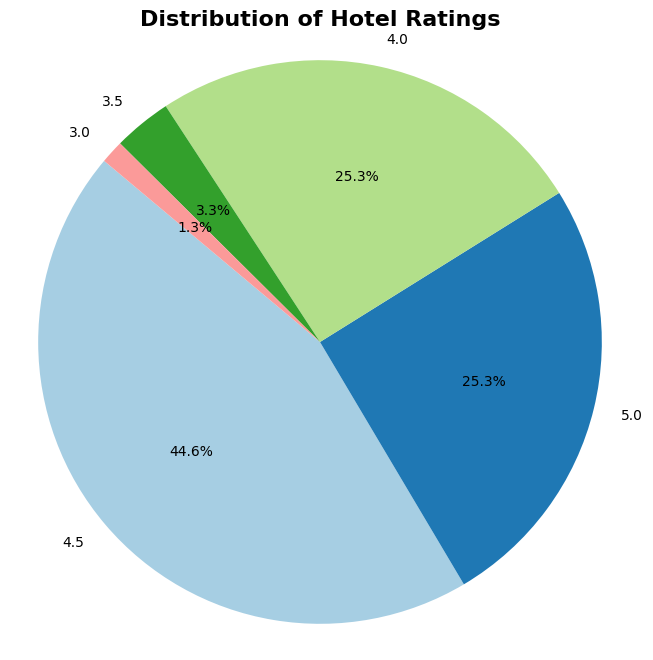

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup with rating counts
rating_data = {
    'rating_value': [4.5, 5.0, 4.0, 3.5, 3.0],
    'count': [2677, 1520, 1520, 200, 80]
}
df_ratings = pd.DataFrame(rating_data)

# Calculate total count and percentage for each rating
df_ratings['percentage'] = (df_ratings['count'] / df_ratings['count'].sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_ratings['percentage'], labels=df_ratings['rating_value'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Hotel Ratings', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
import pandas as pd
# Create a list to store the data
summary_data = []

# Iterate through the hotel summaries and extract data
for hotel, summary_info in hotel_summaries_detailed.items():
    summary_data.append({
        'hotel_name': hotel,
        'summary': summary_info['summary']
    })

# Create a DataFrame from the extracted data
summary_df = pd.DataFrame(summary_data)

# Calculate average rating for each hotel
average_ratings = df.groupby('hotel_name')['rating_value'].mean()

# Add average rating to summary_df
summary_df = summary_df.merge(average_ratings, on='hotel_name', how='left')
summary_df.rename(columns={'rating_value': 'average_rating'}, inplace=True)


# Merge hotel_description and city from original DataFrame
summary_df = summary_df.merge(df[['hotel_name', 'hotel_description', 'locality']].drop_duplicates('hotel_name'), on='hotel_name', how='left')

# Merge hotel_image from original DataFrame
# Get unique hotel images
hotel_images = df[['hotel_name', 'hotel_image']].drop_duplicates('hotel_name')
# Merge hotel images into summary_df
summary_df = summary_df.merge(hotel_images, on='hotel_name', how='left')

summary_df


,hotel_name,summary,average_rating,hotel_description,locality,hotel_image
0,AJWA Sultanahmet,hotel great location wonderful guests easy acc...,5.0,"More than a mere five-star hotel, AJWA Sultana...",Istanbul,https://dynamic-media-cdn.tripadvisor.com/medi...
1,Ace Hotel New York,great experience the great experience ace hote...,4.5,Reception - Ace Hotel NYC.,New York City,https://media-cdn.tripadvisor.com/media/photo-...
2,Ameritania At Times Square,simply worded well - priced well - run hotel p...,4.5,"Discover the Ameritania Hotel, where fun and m...",New York City,https://media-cdn.tripadvisor.com/media/photo-...
3,Argonaut Hotel,bed super comfortable staff friendly attentive...,4.5,Located in the heart of San Francisco's Fisher...,San Francisco,https://media-cdn.tripadvisor.com/media/photo-...
4,Arlo SoHo,loved hotel service great special mention alej...,4.5,Arlo SoHo Hotel features 325 thoughtfully desi...,New York City,https://media-cdn.tripadvisor.com/media/photo-...
...,...,...,...,...,...,...
145,Wyndham Grand Istanbul Kalamis Marina Hotel,stay wyndham grand istanbul kalamis impressed ...,4.5,Anti allergic and disabled rooms available.,Istanbul,https://media-cdn.tripadvisor.com/media/photo-...
146,Wyndham Istanbul Oldcity,dont waste time money near star would say two ...,4.5,Wyndham Istanbul Oldcity is a 138-room hotel l...,Istanbul,https://media-cdn.tripadvisor.com/media/photo-...
147,YOTEL Istanbul Airport Hotel (Landside),convenient location staff friendly friendly ni...,4.0,"Istanbul Airport is home both to YOTEL, offeri...",Istanbul,https://dynamic-media-cdn.tripadvisor.com/medi...
148,citizenM Paris Champs-Elysees,super friendly staff personable great facility...,4.5,"Picasso, Hemingway, Fitzgerald – there's a rea...",Paris,https://media-cdn.tripadvisor.com/media/photo-...


<ipython-input-156-5a58477c7db5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=summary_df, x='average_rating', y='locality', palette='Dark2')


Text(0.5, 1.0, 'Distribution of Average Hotel Ratings by Locality')

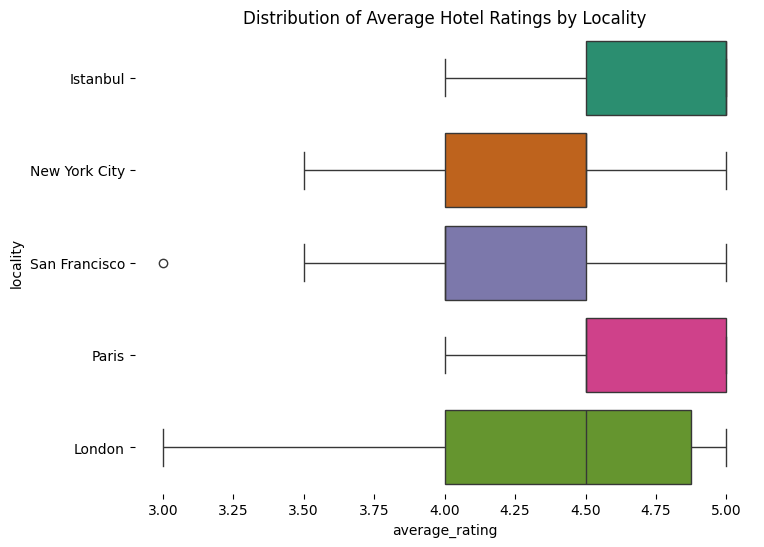

In [ ]:
# Plot locality vs average_rating using a box plot
figsize = (8, 1.2 * len(summary_df['locality'].unique()))
plt.figure(figsize=figsize)
sns.boxplot(data=summary_df, x='average_rating', y='locality', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Add title and labels
plt.title('Distribution of Average Hotel Ratings by Locality')


By using insights from the box plot, businesses can better understand customer preferences and satisfaction levels. This helps them improve service quality and meet customer expectations, leading to happier customers and stronger customer relationships. Ultimately, this benefits both the business and its customers, creating a positive outcome for everyone involved.

In [ ]:
from sentence_transformers import SentenceTransformer, util
embedding = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#sample= summary_df[:20]

summary_df["embedding"] = summary_df["summary"].apply(lambda x: embedding.encode(x))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Top 3 most similar hotels:
Hotel Name: Canopy by Hilton London City
hotel description: Canopy by Hilton London City is an impressive new hotel located in one of Europe’s trendiest urban areas, London’s East End. The neighbourhood is an eclectic and vibrant place filled with iconic landmarks, culture and magnificent modern architecture. The Tower of London and Tower Bridge are amongst the most visited attractions in London and can be reached within 5 minutes.
summary: great hotel guests went way ensure memorable room made rose petal free champagne great central location near tower london good bus tube location. great tv comfy bed would really expected king size standard type hotel view good either excellent shower towel x bathsheet x hand towel would liked medium hairdryer good.
locality: London
Similarity Score: 0.6079024076461792



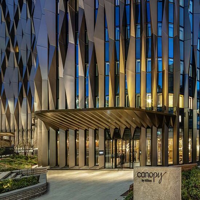



Hotel Name: The Resident Covent Garden
hotel description: Renowned for its elegant central Piazza, charming independent market stalls, vibrant street performers, and for having some of the best luxury shopping and fine dining in the capital, not to mention being home to the world-famous Royal Opera House and West End theatres, Covent Garden is one of London's most enchanting and inspirational destinations. The Resident Covent Garden is just a 3-minute walk from the main central Piazza (and within a 5-minute walk from both Covent Garden and Charing Cross stations), providing an oasis of calm right in the heart of the action. It offers 57 stylish and thoughtfully designed contemporary bedrooms, each featuring bespoke furniture hand-made locally in West London, luxurious throws and cushions made from natural fibres woven on the Isle of Bute, Scotland, and special edition Paul Smith Anglepoise lamps, as part of the brand’s focus on quality British design and craftsmanship. They each also

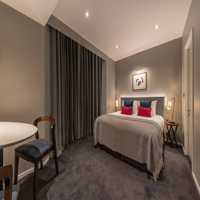



Hotel Name: St. Athans Hotel
hotel description: The St. Athans Hotel, Bloomsbury, is a simple, eco-friendly, family-run bed & breakfast in the heart of London. It’s grade II listed 200 year old Georgian terraced houses retain many of its their original features, fitting in well with the historic area, and is within walking distance of the British Museum, the University of London, Covent Garden and the new British Library. We’re also only a short bus ride away from many major the attractions, such as of Madame Tussaud’s and London’s West End, with its many shops, theatres, bars, and restaurants.
summary: staff really lovely ensuite room great selection book board game great variety local bar restaurant nice park within stone throw hesitate book st athans hotel next trip london really friendly clean pretty everything need ask need anything bed comfy really quiet definitely stay ritz savoy cheap cheerful situated brilliantly london.
locality: London
Similarity Score: 0.5816301107406616


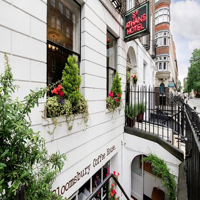



None


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from IPython.display import display
import requests


def search(query):

  query_embedding = embedding.encode(query)
  summary_df["similarity"] = summary_df["embedding"].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])
  results = summary_df.sort_values("similarity", ascending=False).head(3)# we can chage top
  print("Top 3 most similar hotels:")

  for index, row in results.iterrows():
      print(f"Hotel Name: {row['hotel_name']}")
      print(f"hotel description: {row['hotel_description']}")
      print(f"summary: {row['summary']}")
      print(f"locality: {row['locality']}")
      print(f"Similarity Score: {row['similarity']}\n")
      # Open the image using Image.open() and display it
      image = Image.open(requests.get(row['hotel_image'], stream=True).raw) # Assuming 'hotel_image' contains a URL
      display(image.resize((200, 200))) # Resize and display the image
      print("\n")



# Example usage
query = 'a hotel in london and great food nearby but not too expensive'
q_cleaned = clean_text(query)
results = search(q_cleaned)
print(results)

In [ ]:
import gradio as gr

def search_gradio(query):
  query_embedding = embedding.encode(query)
  summary_df["similarity"] = summary_df["embedding"].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])
  results = summary_df.sort_values("similarity", ascending=False).head(3)
  output = ""

  for index, row in results.iterrows():
      output += f"**Hotel Name**: {row['hotel_name']}\n"
      output += f"**Hotel Description**: {row['hotel_description']}\n"
      output += f"**Summary**: {row['summary']}\n"
      output += f"**Locality**: {row['locality']}\n"
      output += f"**Average Rating**: {row['average_rating']}\n"  # Include average rating
      output += f"**Similarity Score**: {row['similarity']}\n\n"
  return output

# Create a Gradio interface
# Update to use gr.Textbox for both inputs and outputs
demo = gr.Interface(
    fn=search_gradio,
    inputs=gr.Textbox(lines=2, label="Enter your query"),  # Use gr.Textbox directly
    outputs=gr.Textbox(label="Search Results")  # Use gr.Textbox directly
)

demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a99a0e263a126ff0bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
